<b><font size=6 color='green'>ch14. 데이터프레임과 시리즈(Pandas) - part1</font>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns 

# 1. 다양한 종류의 파일 읽어 들이기

* pandas의 read계열 함수들의 encoding 디폴트 값은 utf-8이다

In [2]:
data = pd.read_json('data/ch09_member1.json',encoding='cp949')
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,24,kim@hong.com,경기


In [6]:
iris = pd.read_hdf('data/ch09_iris2.hdf5') # HDFS 파일 : 딥러닝 모델을 저장하는데 주로 쓰임
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


HDFS 파일 : 딥러닝 모델의 결과를 파일로 저장하는데 주로 쓰임

In [5]:
data = pd.read_csv('data/ch09_member5.csv')
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,석길동,26,hong@hong.com,부산
2,신길동,31,hong@hong.com,광주


In [4]:
data = pd.read_csv('data/ch09_member1.csv',header=None, names=['name','age','email','address'])
data

,name,age,email,address
0,'홍길동',20,'kildong@hong.com','서울시 강동구'
1,'윤길동',25,'yoonkil@hong.com','서울시 강서구'
2,'한길동',25,'hankil@hong.com','서울시 은평구'


header가 없는 csv 파일을 불러 읽어들이는 법. 

header=None 으로 설정하고, names 옵션에 지정할 header 리스트를 넣어준다

# 2. 데이터 프레임 생성하기 & 열, 행이름 지정하기

In [8]:
df = pd.DataFrame({'name':['홍길동','김길동','김순자','이순재'],'score':[90,92,95,100]})

In [9]:
df

,name,score
0,홍길동,90
1,김길동,92
2,김순자,95
3,이순재,100


데이터프레임은 각 열이 딕셔너리의 요소들로 이루어졌다고 볼 수 있다. 

따라서 DataFrame 함수에 딕셔너리 또는 딕셔너리를 담은 리스트를 넣어주면 각 key값이 열의 이름으로, value값이 각 열의 값으로 들어간다

In [10]:
df.columns = ['이름','점수']

In [11]:
df

,이름,점수
0,홍길동,90
1,김길동,92
2,김순자,95
3,이순재,100


df.columns를 하면 데이터 프레임의 열이름을 리스트로 반환한다

In [12]:
df.index = ['0번','1번','2번','3번']
df

,이름,점수
0번,홍길동,90
1번,김길동,92
2번,김순자,95
3번,이순재,100


df.index를 하면 각 행의 이름을 리스트로 반환한다

# 3. 부분 데이터 조회하기

## 3.1 loc 이나 iloc을 이용하지 않는 조회법

In [14]:
iris = df = sns.load_dataset('iris')

In [16]:
iris['species'] 

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

열 명칭을 통해 조회하는 법. 단일 열 조회시 list와 같은 pandas Series를 반환한다. 

In [21]:
iris[['sepal_length','sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


다중열 조회를 하면 데이터 프레임을 반환하게 된다

In [24]:
iris[iris.sepal_length > 5.0][['sepal_length','species']]

,sepal_length,species
0,5.1,setosa
5,5.4,setosa
10,5.4,setosa
14,5.8,setosa
15,5.7,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


In [31]:
iris[(iris.sepal_length < 5.0) & (iris.species == 'setosa')]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
22,4.6,3.6,1.0,0.2,setosa


특정 조건을 만족하는 행을 추출하는 법. 

주의할 점은 파이썬 내에서는 연산자 우선순위가 논리 연산자가 비교 연산자 보다 높기 때문에 위와 같은 상황에서는 꼭 소괄호를 통해 비교연산자가 논리연산자 보다 먼저 수행 될 수 있도록 해주어야한다.

## 3.2 loc을 이용한 부분 조회

In [32]:
iris.loc[:,['sepal_length','sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [33]:
iris.loc[(iris.sepal_length < 5.0) & (iris.species == 'setosa')]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
22,4.6,3.6,1.0,0.2,setosa


loc 이나 iloc을 이용하지 않는 기본 조회법과 사용법이 동일하다. 

다만, loc이용시 꼭 행과 열을 모두 명시해줘야 한다.

## 3.3 iloc을 통한 부분조회

In [34]:
iris.iloc[0:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


0번째 부터 2번째 까지의 행을 가져온다 (0번째, 2번째 모두 포함)

In [36]:
iris.iloc[:,::2]

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
145,6.7,5.2,virginica
146,6.3,5.0,virginica
147,6.5,5.2,virginica
148,6.2,5.4,virginica


처음 부터 끝까지의 열을 2씩 인덱스를 건너뛰며 가져온다

In [38]:
iris.iloc[:,::-1]

,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,0.2,1.4,3.5,5.1
1,setosa,0.2,1.4,3.0,4.9
2,setosa,0.2,1.3,3.2,4.7
3,setosa,0.2,1.5,3.1,4.6
4,setosa,0.2,1.4,3.6,5.0
...,...,...,...,...,...
145,virginica,2.3,5.2,3.0,6.7
146,virginica,1.9,5.0,2.5,6.3
147,virginica,2.0,5.2,3.0,6.5
148,virginica,2.3,5.4,3.4,6.2


iris 데이터 프레임 내의 열들을 뒤에서 부터 처음 까지 거꾸로 읽어온다

# 4. 판다스 데이터 프레임 함수

## 4.1 결측치 관련 함수

In [40]:
titanic = sns.load_dataset('titanic')

titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

isna 함수는 결측치가 있으면 True를 반환하고 없으면 False를 반환한다. 

sum 함수를 함께 써주어서 각 열당 결측치의 갯수를 파악할 수 있다

In [42]:
titanic.dropna(how='any')
titanic.dropna(how='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


dropna 함수는 결측치가 포함된 행을 삭제 하는데 

how='any'로 옵션을 설정하면 결측치가 하나라도 포함된 행을 전부 삭제 하고, 

how='all'로 옵션을 설정하면 모든 열에 대한 데이터 값이 결측치인 행만 삭제한다

In [45]:
titanic['age'].fillna(np.mean(titanic.age))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

fillna 함수를 통해 결측치를 특정값으로 대치 할 수 있다.

## 4.2 결측치 처리 전용 라이브러리 missingno

In [46]:
import missingno as msno
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore') # 경고문구 출력을 막음 
plt.rc('font',family='Malgun Gothic')  # 윈도우즈 한글 기본설정 
plt.rc('axes',unicode_minus=False) # 그래프 축의 - 부호가 유니코드로 깨지는 것을 방지 

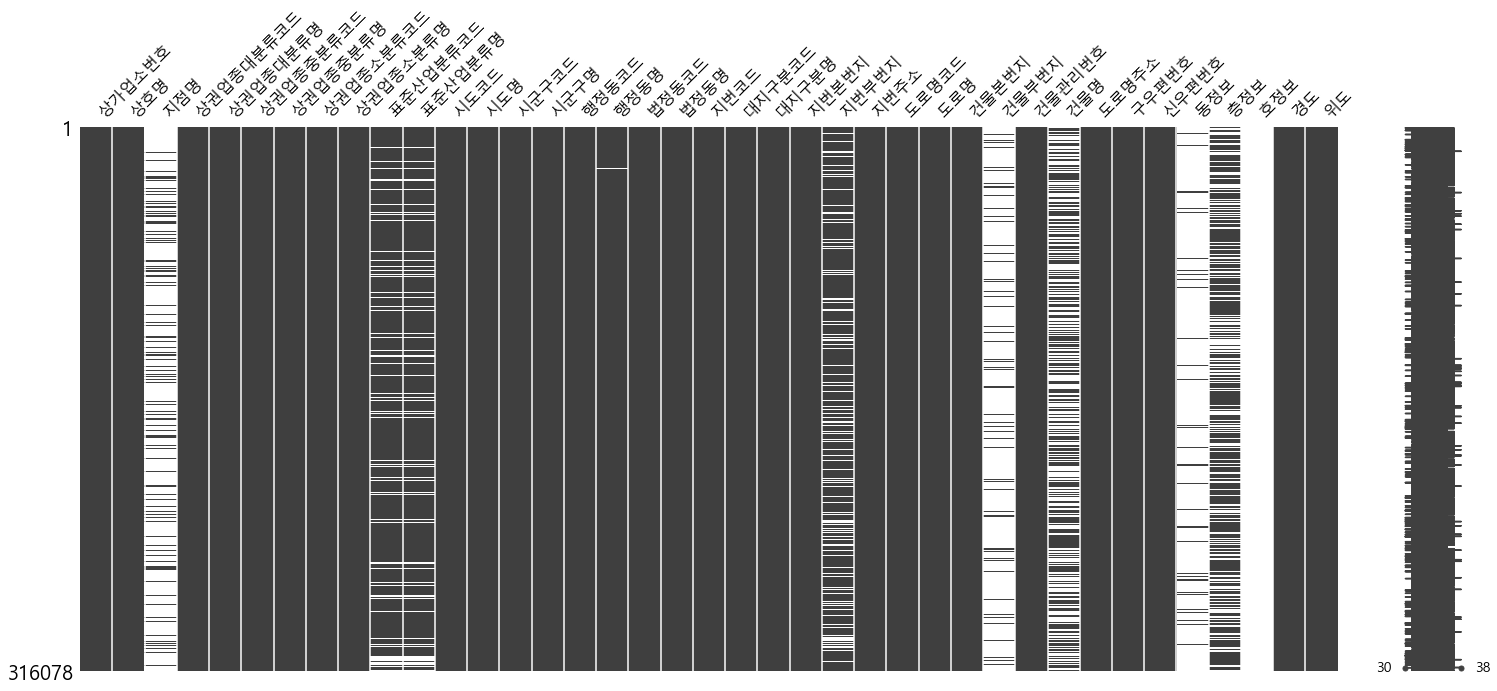

In [47]:
df_seoul = pd.read_csv('data/소상공인/소상공인시장진흥공단_상가(상권)정보_서울_202106.csv')
msno.matrix(df_seoul)
plt.show()

하얀 색으로 표현된 부분이 결측치가 관측되는 행이다. 

msno.matrix를 통해 대략적으로 어느 특성열에 결측치가 많은지 한눈으로 파악할 수 있다.

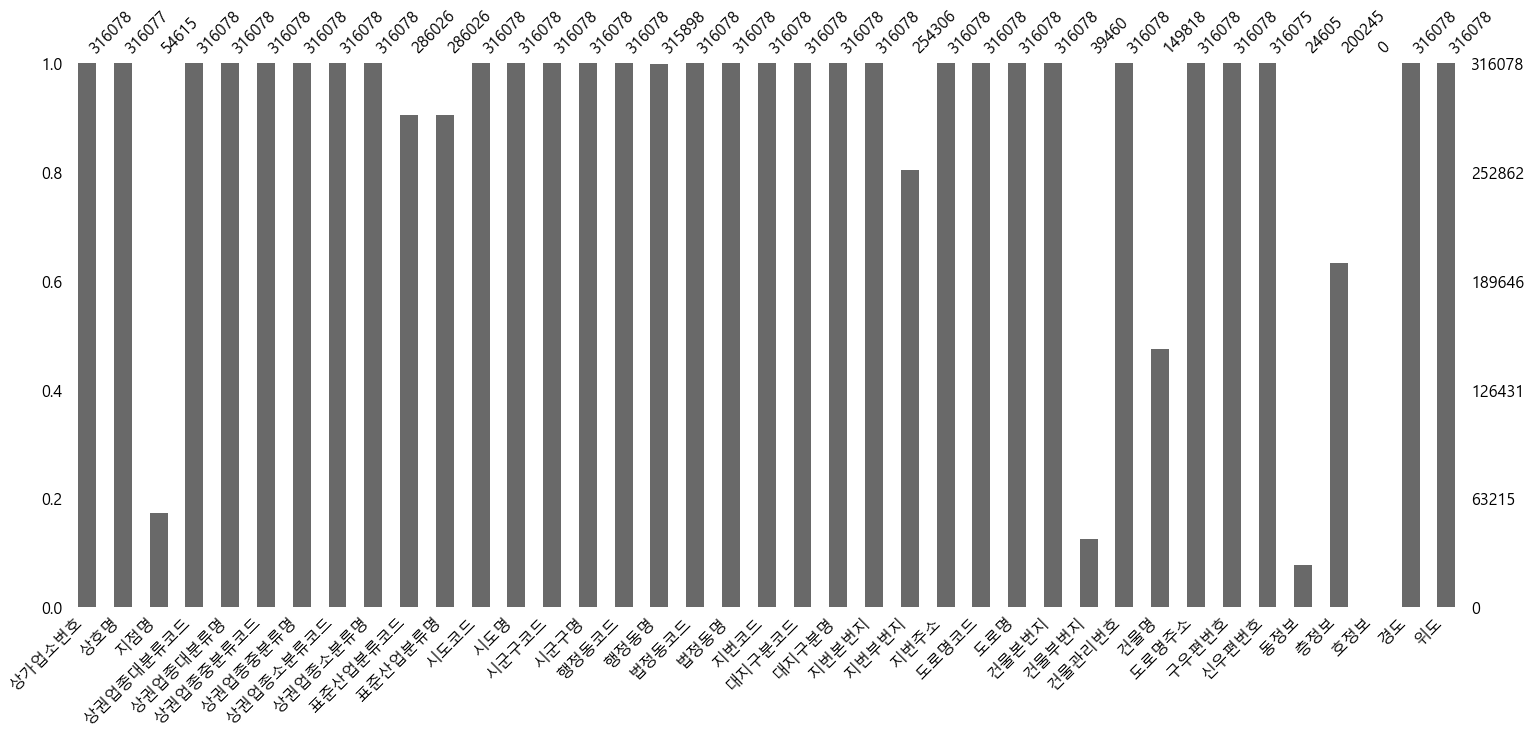

In [48]:
msno.bar(df_seoul)
plt.show()

결측치가 아닌 데이터의 수를 각 열 별로 바 차트를 통해 나타낸다

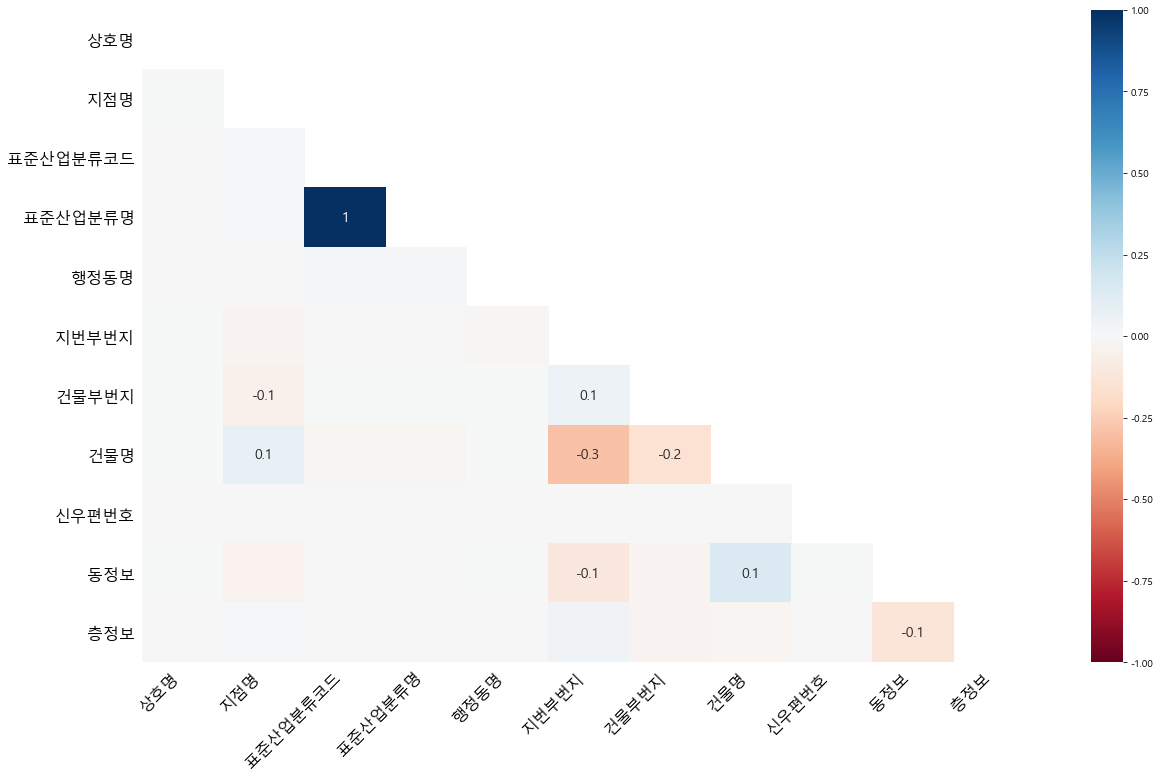

In [50]:
msno.heatmap(df_seoul)
plt.show()

결측치가 존재하는 열들끼리의 상관관계 정도를 heatmap으로 나타낸다. 

예를 들어, '표준산업분류명'과 '표준산업분류코드'는 1의 상관 관계를 보인다, 즉 같은 열로 봐도 무방하다는 뜻이다. 

따라서 둘 중의 하나의 열은 삭제한다. 